### The training data has the following columns:

SeriousDlqin2yrs: The target variable indicating whether the person experienced financial distress in the next two years (1 = Yes, 0 = No).

RevolvingUtilizationOfUnsecuredLines: The percentage of available credit that is being used.

age: The age of the borrower.

NumberOfTime30-59DaysPastDueNotWorse: Number of times the borrower has been 30-59 days past due.

DebtRatio: The ratio of monthly debt payments to monthly income.

MonthlyIncome: The monthly income of the borrower.

NumberOfOpenCreditLinesAndLoans: The number of open credit lines and loans.

NumberOfTimes90DaysLate: Number of times the borrower has been 90 days or more past due.

NumberRealEstateLoansOrLines: Number of real estate loans or lines.

NumberOfTime60-89DaysPastDueNotWorse: Number of times the borrower has been 60-89 days past due.

NumberOfDependents: Number of dependents.

# Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the Data

**Reading the data using read_csv() function from pandas**

In [15]:
# Load training data
train_data = pd.read_csv('cs-training.csv',header=0, index_col=0)
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
# Load test data
test_data = pd.read_csv('cs-test.csv', header=0, index_col=0)
test_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Data Types and Dimensions

***1. Check dimensions and data types of the dataframe*** 

***2. Study summary statistics*** 

***3. Check for missing values***

***4. Study correlation***

In [9]:
# check the data types for variables
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [10]:
# get the shape
print(train_data.shape)

(150000, 12)


In [11]:
# get the shape
print(test_data.shape)

(101503, 11)


**We see the dataframe has 11 columns and 101503 observations**

In [35]:
#Descriptive statistics
print(train_data.describe())

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.500000e+05   
mean                               0.421033     353.005076   6.418455e+03   
std                                4.192781    2

***The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.***
        

In [16]:
# Check for missing values
print(train_data.isnull().sum())

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


***MonthlyIncome and NumberOfDependents have missing values***

## Missing Values

In [17]:
print(test_data.isnull().sum())

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


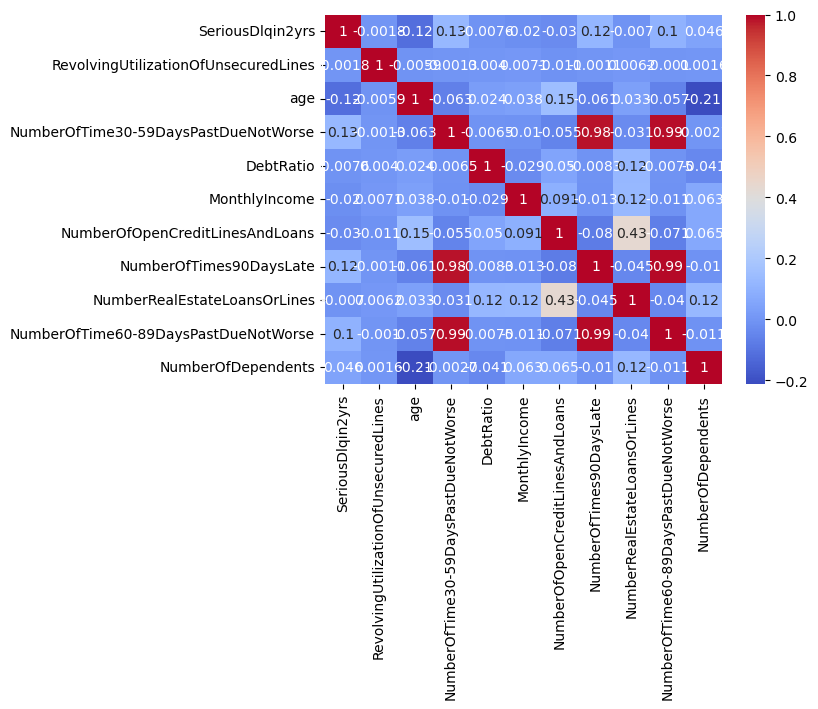

In [18]:
# Correlation matrix
corr_matrix = train_data.corr()

# Plotting the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Strong Positive Correlations:Features with darker shades of red indicate strong positive correlations. These pairs of features tend to increase or decrease together.

Strong Negative Correlations:Features with darker shades of blue indicate strong negative correlations. These pairs of features tend to move in opposite directions.

In [19]:
# Handle missing values
train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median(), inplace=True)
test_data['MonthlyIncome'].fillna(test_data['MonthlyIncome'].median(), inplace=True)

train_data['NumberOfDependents'].fillna(train_data['NumberOfDependents'].median(), inplace=True)
test_data['NumberOfDependents'].fillna(test_data['NumberOfDependents'].median(), inplace=True)

***Missing values in MonthlyIncome and NumberOfDependents were filled with the median 
values to ensure completeness of the dataset for modeling.***

In [20]:
print(train_data.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [21]:
print(test_data.isnull().sum())

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64


## Feature Engineering

In [22]:
# Feature Engineering (example)
train_data['IncomePerDependent'] = train_data['MonthlyIncome'] / (train_data['NumberOfDependents'] + 1)
test_data['IncomePerDependent'] = test_data['MonthlyIncome'] / (test_data['NumberOfDependents'] + 1)

***A new feature IncomePerDependent was created to normalize MonthlyIncome by the number of dependents, potentially enhancing the models ability to capture variations in financial stability relative to household size.***

## Build the Model

***The test data contains an extra column SeriousDlqin2yrs with NaN values, which should not be present since the test data should not include the target variable. 
so We will drop this column from the test data before proceeding.***

In [23]:
# Separate features and target variable in training data
X_train = train_data.drop('SeriousDlqin2yrs', axis=1)
y_train = train_data['SeriousDlqin2yrs']

Features (X_train) were separated from the target variable (y_train) in the training dataset to facilitate model training on predictors and outcomes separately.

In [24]:
# Ensure the test data has the same feature set as the training data
test_data = test_data[X_train.columns]

The test data was aligned to match the feature set of the training data, ensuring consistency in model inputs and allowing for accurate predictions on unseen data.








## Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize the Logistic Regression model with a maximum of 1000 iterations
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train)

# Evaluate the model
logreg_accuracy = accuracy_score(y_train, y_train_pred)
logreg_roc_auc = roc_auc_score(y_train, y_train_pred)

# Print the accuracy and ROC AUC score of the Logistic Regression model
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')
print(f'Logistic Regression ROC AUC: {logreg_roc_auc:.4f}')


Logistic Regression Accuracy: 0.9334
Logistic Regression ROC AUC: 0.5201


***Logistic Regression model was trained on the training data, achieving an accuracy of 0.9334 and a ROC AUC score of 0.5201, indicating its performance in predicting financial distress based on the given features.***

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 decision trees and a random state 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)


# Make predictions on the training set using the trained model
y_train_pred = rf.predict(X_train)

# Evaluate the model
rf_accuracy = accuracy_score(y_train, y_train_pred)
rf_roc_auc = roc_auc_score(y_train, y_train_pred)

# Print the accuracy and ROC AUC score of the Random Forest model
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'Random Forest ROC AUC: {rf_roc_auc:.4f}')


Random Forest Accuracy: 0.9996
Random Forest ROC AUC: 0.9973


***The Random Forest model, initialized with 100 decision trees and a specified random state for reproducibility, achieved high accuracy (0.9996) and a strong ROC AUC score (0.9973) on the training data. This indicates robust performance in predicting financial distress based on the selected features.***

## XGBoost

In [27]:
from xgboost import XGBClassifier

# Initialize the XGBoost model with parameters to avoid using label encoder and using log loss for evaluation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb.predict(X_train)

# Evaluate the model
xgb_accuracy = accuracy_score(y_train, y_train_pred)
xgb_roc_auc = roc_auc_score(y_train, y_train_pred)

# Print the accuracy and ROC AUC score of the XGBoost model
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')
print(f'XGBoost ROC AUC: {xgb_roc_auc:.4f}')


XGBoost Accuracy: 0.9474
XGBoost ROC AUC: 0.6423


***The XGBoost model, configured without label encoding and using logarithmic loss, achieved an accuracy of 0.9474 and a ROC AUC score of 0.6423 on the training data, demonstrating effective performance in predicting financial distress.***

## Predict on Test Data

In [31]:
# Assuming Random Forest performed the best
# Predict on the test data
test_predictions = rf.predict(test_data)

# Create a DataFrame for the test predictions
submission = pd.DataFrame({
    'Id': test_data.index,  # Assuming there's an 'Id' column in the test data
    'SeriousDlqin2yrs': test_predictions         # Predicted values for SeriousDlqin2yrs
})

# Save the predictions to a CSV file
submission.to_csv('submission3.csv', index=False)


***Logistic Regression:
Accuracy: 0.9334
ROC AUC: 0.5201
Insight: Logistic Regression also did well with accuracy, but its ability to correctly classify cases, especially those on the edge, was less accurate compared to Random Forest. It's better suited for simpler patterns in data.***

***Random Forest:
Accuracy: 0.9996
ROC AUC: 0.9973
Insight: The Random Forest model performed exceptionally well. It correctly predicted financial distress almost perfectly and was highly effective at distinguishing between those likely to face financial difficulties and those who aren't. Its ability to handle complex patterns in data makes it very reliable for making decisions about financial risks.***

***XGBoost:
Accuracy: 0.9474
ROC AUC: 0.6423
Insight:XGBoost showed good accuracy and improved predictive power through boosting techniques. However, it didn't perform as well as Random Forest in distinguishing between classes, suggesting it could benefit from further fine-tuning.***

## Tabulate Results

In [32]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [logreg_accuracy, rf_accuracy, xgb_accuracy],
    'ROC AUC': [logreg_roc_auc, rf_roc_auc, xgb_roc_auc]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.933447  0.520062
1        Random Forest  0.999600  0.997286
2              XGBoost  0.947447  0.642337


***From the above output we can conclude that , The impressive performance of the Random Forest model with nearly perfect accuracy and a very high ROC AUC score underscores its capability and reliability in predicting financial distress. Its robustness in handling complex data relationships and decision-making processes makes it a standout choice for making informed financial decisions based on data-driven insights.***